In [193]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image


# origin_panda = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg')
# origin_bird = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
# origin_self_1 = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1.jpg'),cv2.COLOR_BGR2RGB)
# origin_lenna = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/Lenna.png'),cv2.COLOR_BGR2RGB)
# TestImage_Path = 'C:/Users/admin/Desktop/ImageAnalysis/Test_Image/'


TestImage_Path = 'Test_Image/'

origin_panda = cv2.imread(TestImage_Path+'panda.jpg')
origin_bird = cv2.imread(TestImage_Path+'QuteBird.jpg')
origin_self_1 = cv2.cvtColor(cv2.imread(TestImage_Path+'self_1.jpg'),cv2.COLOR_BGR2RGB)
origin_tree = cv2.cvtColor(cv2.imread(TestImage_Path+'tree.jpg'),cv2.COLOR_BGR2RGB)
origin_lenna = cv2.cvtColor(cv2.imread(TestImage_Path+'Lenna.png'),cv2.COLOR_BGR2RGB)

origin_howon = cv2.cvtColor(cv2.imread(TestImage_Path+'howon.jpg'),cv2.COLOR_BGR2RGB)
origin_minho = cv2.cvtColor(cv2.imread(TestImage_Path+'minho.jpg'),cv2.COLOR_BGR2RGB)
origin_minho_jisu = cv2.cvtColor(cv2.imread(TestImage_Path+'minho_jisu.jpg'),cv2.COLOR_BGR2RGB)
origin_Character_1 = cv2.cvtColor(cv2.imread(TestImage_Path+'Character.jpg'),cv2.COLOR_BGR2RGB)

origin_sns_post = cv2.cvtColor(cv2.imread(TestImage_Path+'cat_1.jpg'),cv2.COLOR_BGR2RGB)




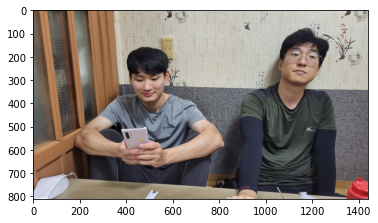

In [194]:
plt.imshow(origin_minho_jisu)

In [3]:
# 색체널 분리



def Color_channel(img,color_range=60,brightness_range = (0,255),chroma_range = (0,255)):
    
    
    # color_range max = 60 색의 범위를 결정할 숫자
    # brightness_range = (0,255) 명도
    # chroma_range = (0,255) 채도


    red_lower = np.array([0-(color_range/2),chroma_range[0],brightness_range[0]])
    red_upper = np.array([0+(color_range/2),chroma_range[1],brightness_range[1]])
    green_lower = np.array([60-(color_range/2),chroma_range[0],brightness_range[0]])
    green_upper = np.array([60+(color_range/2),chroma_range[1],brightness_range[1]])
    blue_lower = np.array([120-(color_range/2),chroma_range[0],brightness_range[0]])
    blue_upper = np.array([120+(color_range/2),chroma_range[1],brightness_range[1]])
    
    
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    red_mask = cv2.inRange(hsv,red_lower,red_upper)
    green_mask = cv2.inRange(hsv,green_lower,green_upper)
    blue_mask = cv2.inRange(hsv,blue_lower,blue_upper)
    
    red = cv2.bitwise_and(img,img,mask=red_mask)
    green = cv2.bitwise_and(img,img, mask = green_mask)
    blue = cv2.bitwise_and(img,img,mask = blue_mask)
    
    return red, green, blue

def makeHist(img):
    h,s,v = cv2.split(img)
    f,ax = plt.subplots(2,3)
    f.set_size_inches(15,7)
    ax[0,0].imshow(h)
    ax[0,1].imshow(s)
    ax[0,2].imshow(v)


    hist_h = cv2.calcHist(img,[0],None,[256],[0,256])
    hist_s = cv2.calcHist(img,[1],None,[256],[0,256])
    hist_v = cv2.calcHist(img,[2],None,[256],[0,256])


    ax[1,0].plot(hist_h)
    ax[1,1].plot(hist_s)
    ax[1,2].plot(hist_v)

    
def make_V(img):
    h,s,v = cv2.split(img)
    f,ax = plt.subplots(2,1)
    f.set_size_inches(15,7)

    ax[0].imshow(v)
    hist_v = cv2.calcHist(img,[2],None,[256],[0,256])
    ax[1].plot(hist_v)

def hsv_equalizeHist(img):

    panda_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    panda_hsv[:, :, 0] = cv2.equalizeHist(panda_hsv[:, :, 0])
    panda_hsv[:, :, 1] = cv2.equalizeHist(panda_hsv[:, :, 1])
    panda_hsv[:, :, 2] = cv2.equalizeHist(panda_hsv[:, :, 2])
    return cv2.cvtColor(img,cv2.COLOR_HLS2BGR)



def canny_closed(img,th_1 = 100,th_2 =250,kernel_val=9):

    edged = cv2.Canny(img, th_1, th_2)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_val,kernel_val))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    return   edged , closed


def color_enhanced(img):
    enhanced_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
    return cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)


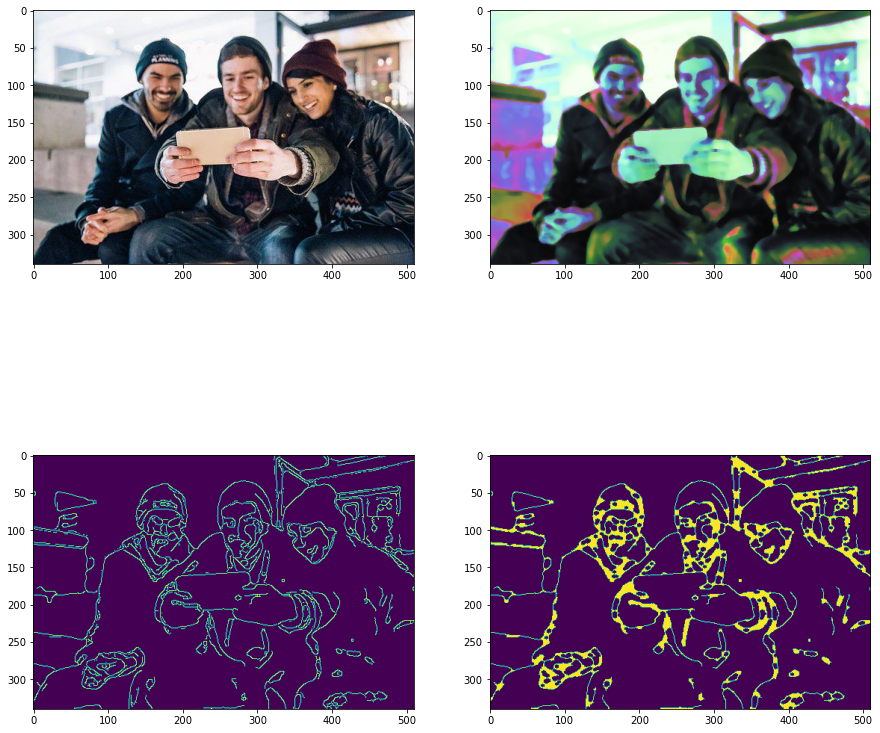

In [4]:
origin = origin_self_1.copy()
# origin = color_enhanced(origin)
origin_HE = hsv_equalizeHist(origin)
HE_me = cv2.medianBlur(origin_HE,7)
cny, clo = canny_closed(HE_me,th_1=100,th_2=300,kernel_val=5)
f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)
ax[0,0].imshow(origin)
ax[0,1].imshow(HE_me)
ax[1,0].imshow(cny)
ax[1,1].imshow(clo)

## 컨투어를 선별하고 그리기
#### 모든 컨투어를 다 활용하는것은 효율적이지 못하다
- 계산해야하는 영역의 갯수와 시간복잡도는 정비례한다
- 너무 작은 컨투어들은 노이즈 취급을 해도 무관하거나, 노이즈다.
- 따라서 컨투어들을 선별할 알고리즘과 선별된 컨투어들만 보여줄 기능이 필요하다


### 해야할것
- 컨투어 선별하기
    - 컨투어 계층선별
    - 컨투어 크기선별
- 선별한 컨투어 그리기

### 그리고 싶은 컨투어의 인댁스 리스트를 넘겨주면 해당 컨투어만 그리는 코드

In [53]:
#인덱스를 지정해준 컨투어만 그려주기

def drawContourList(img,indexList,contours,color=(255,0,0)):
    
    
#     for i in indexList.keys():
#         data.append(contours[i])

    data = [contours[i] for i in indexList]
    
    white = img.copy()
    white[:,:,:] = 255
    
#     f,ax = plt.subplots(1,2)
#     f.set_size_inches(15,15)
   
#     ax[0].imshow(cv2.drawContours(img, data,-1,color))
#     ax[0].set_title('Origin & Contour')

#     ax[1].imshow(cv2.drawContours(white, data,-1,color))
#     ax[1].set_title('Contour')
    
    return cv2.drawContours(img.copy(), data,-1,color), cv2.drawContours(white, data,-1,(0,0,0))
    

## 컨투어 계층 나누기

- cv2.findContours 함수는 반환값중 하나로 hierarchy를 가지고있음
- hierarchy는 컨투어가 N개 일경우 data[0,N,4]의 형식으로 반환됨. 3번째 차원에 다른 컨투어와의 관계가 저장되어있음. (없을시 -1)
    - data[0,N,0]은 컨투어 N에 이전 컨투어의 번호
    - data[0,N,1]은 컨투어 N에 다음 컨투어의 번호
    - data[0,N,2]은 컨투어 N에 자식 컨투어의 번호
    - data[0,N,3]은 컨투어 N에 부모 컨투어의 번호
    
### 계층을 어떻게 나눌것인가


- data[0,N,2]에는 모든 자식컨투어가 아닌 자식컨투어중 첫째만 보여줌 따라서 N의 자식이 여려명이면 해당 정보로 N의 모든 자식을 알수없음
- data[0,N,3]은 자신의 바로위 조상만 보여줌. 따라서 해당 정보로는 N이 몇명의 조상을 가진지 알수없음
- data[0,N,3] == -1인 컨투어는 부모가 없는 컨투어고, 따라서 최상위 계층의 컨투어임
- 결론적으로 최상위 컨투어로부터 자신을 부모삼는 컨투어들을 바로 밑계층에 두면 컨투어간 계층이 완성됨


In [182]:
# hierarchy를 데이터프레임으로 시각화한것

data = hier.copy()
hier_next = data[0,:,0]
hier_prev = data[0,:,1]
hier_child = data[0,:,2]
hier_parent = data[0,:,3]


df = pd.DataFrame({'prev':hier_prev,'next':hier_next,'parent':hier_parent,'child':hier_child})
df

,prev,next,parent,child
0,-1,1,-1,-1
1,0,2,-1,-1
2,1,3,-1,-1
3,2,4,-1,-1
4,3,8,-1,5
...,...,...,...,...
155,154,156,43,-1
156,155,157,43,-1
157,156,158,43,-1
158,157,159,43,-1


In [5]:
'''
컨투어의 계층을 구분하는 함수. 리스트를 반환하며 하나에 인덱스에는 같은 계층의 컨투어만 저장되어있음


인자값으로 hierarchy 를 받음.( cv2.RETR_TREE 형식으로 구해진 값에만 테스트해봄)

리턴은 튜플형태로 3개의 list를 반환함

cont_hier[0]:  모든 컨투어를 계층별로 반환함
cont_hier[1]:  자식이 있는 컨투어를 계층별로 반환함
cont_hier[2]:  자식이 없는 컨투어를 계층별로 반환함

'''

def cont_hier(hier):
    
 
    hier_child = hier[0,:,2]
    hier_parent = hier[0,:,3]
    
    df = pd.DataFrame({'parent':hier_parent,'child':hier_child})
    
    parent_cont = df[df['child'] != -1]
    lostChild_cont = df[df['child'] == -1]
    
    cont_hier_HaveChild = []
    cont_hier_LostChild = []

    
    li_parent = parent_cont.index
    cnt = 0
    

    # 컨투어 최상위 계층 설정
    cont_hier_HaveChild.append(list(parent_cont[parent_cont['parent'] == -1].index)) #부모가 없고 자식이 있는 컨투어 
    cont_hier_LostChild.append(list(lostChild_cont[lostChild_cont['parent'] == -1].index))                   #부모와 자식이 없는 컨투어

    parent_cont = parent_cont.drop(index= cont_hier_HaveChild[cnt])  #부모데이터프레잉에서 이름제거
    li_parent = parent_cont.index                        #부모리스트 갱신



    # 최하위 컨투어를 지외한 컨투어를 찾기
    while(0 < len(li_parent)):
        
        
        # 임시로 컨투어를 담을 리스트
        temp_hier_HaveChild = []
        temp_hier_LostChild = []

        for i in cont_hier_HaveChild[-1]:
            temp_hier_HaveChild.extend(parent_cont[parent_cont['parent'] == i].index)
            temp_hier_LostChild.extend(lostChild_cont[lostChild_cont['parent'] == i].index)

        cont_hier_HaveChild.append(temp_hier_HaveChild)
        cont_hier_LostChild.append(temp_hier_LostChild)

        parent_cont = parent_cont.drop(index= temp_hier_HaveChild)  #부모데이터프레잉에서 이름제거
        li_parent = parent_cont.index                        #부모리스트 갱신 이것의 길이가 0이면 while끝(모두 찾은것으로 판단)
        
        
    #최하위 컨투어 찾기
  
    for i in cont_hier_HaveChild[-1]:
         temp_hier_LostChild = list(lostChild_cont[lostChild_cont['parent'] == i].index)
    
    cont_hier_HaveChild.append([])# 합치기 위해서 숫자맞춰주는 용도. 자식이 있는 컨투어는 최하위일수 없음
    cont_hier_LostChild.append(temp_hier_LostChild)
        
        
    return list(map(list.__add__,cont_hier_HaveChild,cont_hier_LostChild)),cont_hier_HaveChild, cont_hier_LostChild

        


In [13]:
#cont_hier 함수 검사과정


x = cont_hier(hier)[0]



# # 모든 컨투어가 빠짐없이 들어갔는지 체크, 만약에 빠진 컨투어가 있으면 프린트됨
# xx = []
# for i in x:
#     xx.extend(i)
# print('cont_hier 에서 반환하지 않은 컨투어:')
# for i in df.index:
#     if not i in xx:
#         print(i)
# print('\n\n\n')


# 계층별 요소를 가독성있게 보여줌 여기선    cont_hier[0]
for index, valuse in enumerate(x):
    print(index,'계층의 요소')
    print(valuse)
    print('\n')

0 계층의 요소
[4, 9, 11, 13, 16, 19, 22, 30, 39, 43, 0, 1, 2, 3, 8, 15, 18, 24, 25, 26, 27, 28, 29, 41, 42]


1 계층의 요소
[73, 5, 6, 7, 10, 12, 14, 17, 20, 21, 23, 31, 32, 33, 34, 35, 36, 37, 38, 40, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


2 계층의 요소
[74, 76]


3 계층의 요소
[75]




### 계층별 컨투어 시각화
컨투어 계층 나누기 + 인덱스를 지정해준 컨투어만 그려주기를 이용하여 계층별로 보여준 컨투어

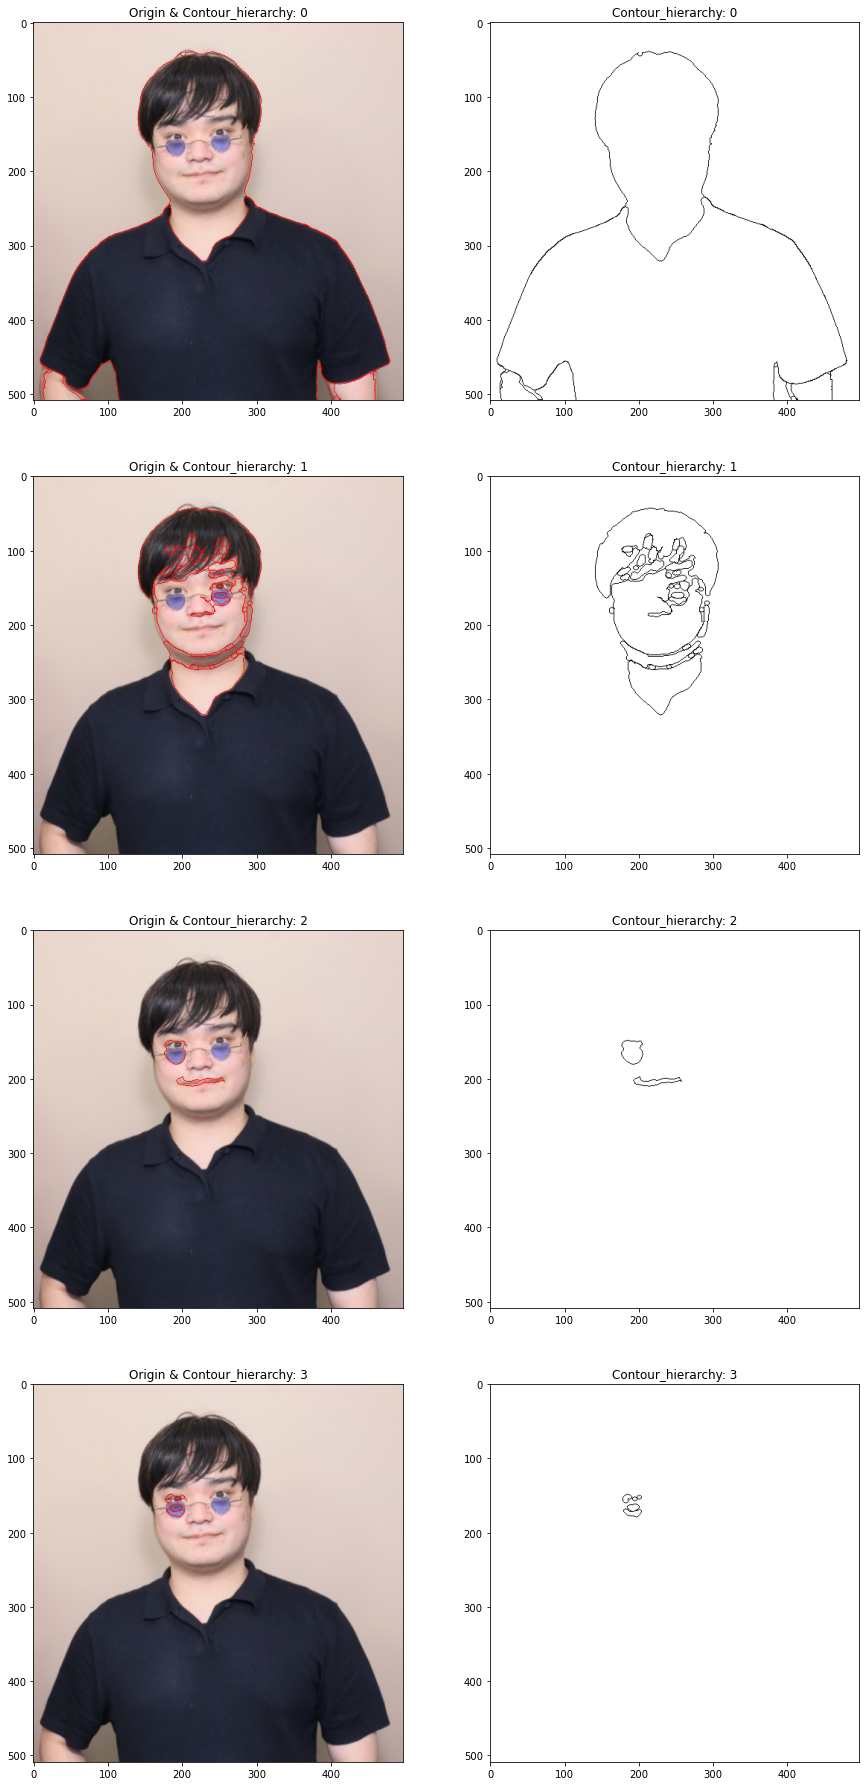

In [110]:
origin = origin_howon.copy()

origin_HE = hsv_equalizeHist(origin)
HE_me = cv2.medianBlur(origin_HE,7)
cny, clo = canny_closed(HE_me,th_1=25,th_2=250,kernel_val=5)
contours,hier=   cv2.findContours(clo.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cont_level = cont_hier(hier)
level_max = len(cont_level[0])
li_ContourImame = []

for i in cont_level[0]:
    li_ContourImame.append(drawContourList(origin,i,contours))
    
    
f,ax = plt.subplots(len(li_ContourImame),2)
f.set_size_inches(15,8*len(li_ContourImame))

for i , valuse in enumerate(li_ContourImame):
    
    ax[i,0].imshow(valuse[0])
    ax[i,0].set_title(f'Origin & Contour_hierarchy: {i}')
    
    ax[i,1].imshow(valuse[1])
    ax[i,1].set_title(f'Contour_hierarchy: {i}')

### 컨투어 크기선별

In [7]:
def cont_SizeFilter(contours,standard):
    li_cont_Size = np.array([cv2.contourArea(i) for i in contours])
    li_cont_result = []
    sta = np.percentile(li_cont_Size,standard)
    
    for i,v in enumerate(li_cont_Size):
        if sta < v :
            li_cont_result.append(i)
        
    return li_cont_result


In [73]:
# 테스트코드
print('All cont:',len(li_cont_Size))
print('Big cont:',len(cont_SizeFilter(contours,25)))

All cont: 210
Big cont: 157


### 컨투어 리스트 교집합

In [8]:
def intersection(heir,size):
    li_result = []
    
    for i in size:
        if i in heir:
            li_result.append(i)
    return li_result 
            
#     return sorted(li_result)

In [100]:
# 테스트코드
level = cont_level[0][0]
size = cont_SizeFilter(contours,25)

print('cont_level[0][0]:')
print(sorted(level))
print('\n')
print('cont_SizeFilter(contours,25):')
print(size)
print('\n')
print('intersection_1:')
print(intersection(size,level))
print('\n')
print('intersection:_2')
print(intersection(level,size))

cont_level[0][0]:
[0, 1, 2, 3, 8, 9, 13, 15, 17, 20, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35]


cont_SizeFilter(contours,25):
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 20, 21, 24, 26, 28, 30, 31, 32, 35, 36, 37, 40, 41, 42, 43, 44, 45, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 100, 103, 104, 105, 106, 107, 108, 109, 111, 113, 117, 119, 120, 122, 123, 124, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 145, 147, 148, 149, 150, 151, 152, 153, 154, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 171, 172, 173, 174, 175, 176, 177, 178, 181, 184, 185, 186, 187, 190, 193, 194, 195, 197, 199, 200, 201, 202, 203, 204, 207, 208]


intersection_1:
[2, 3, 8, 9, 13, 15, 17, 20, 24, 26, 30, 31, 35]


intersection:_2
[2, 3, 8, 9, 13, 15, 17, 20, 24, 26, 30, 31, 35]


## 0 , 1 계급의 상위 75% 컨투어

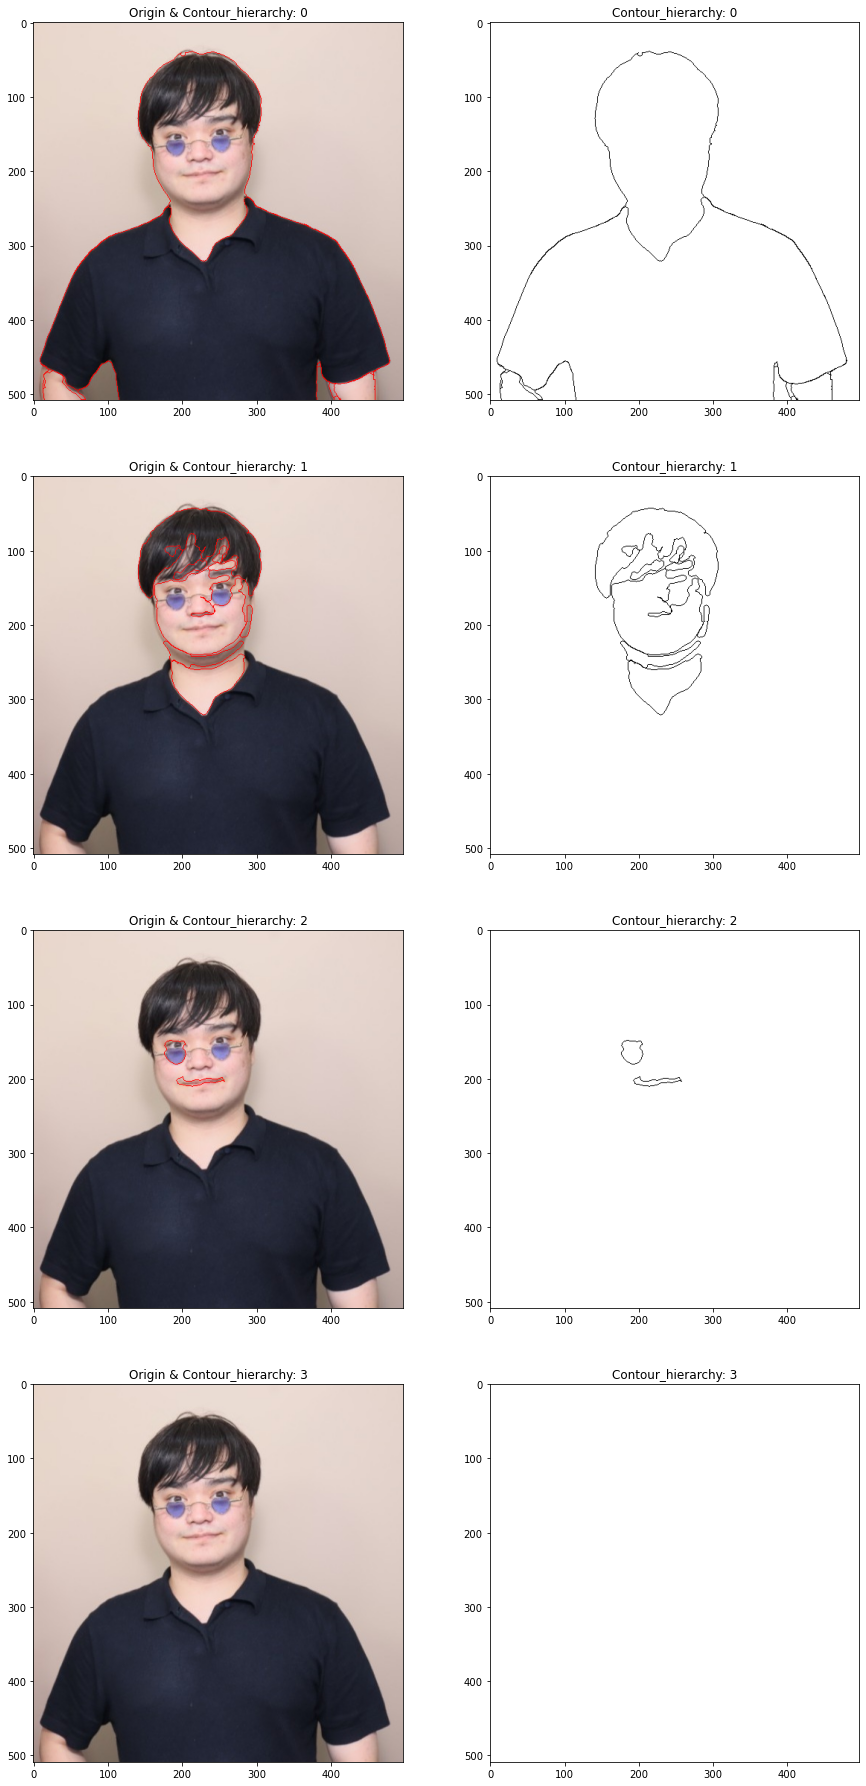

In [87]:





origin = ori.copy()





origin_HE = hsv_equalizeHist(origin)
HE_me = cv2.medianBlur(origin_HE,7)
cny, clo = canny_closed(HE_me,th_1=25,th_2=250,kernel_val=5)
contours,hier=  cv2.findContours(clo.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)



# 컨투어 선별
cont_level = cont_hier(hier)[0]
cont_size = cont_SizeFilter(contours,75)





# # 선별 컨투어 교집합
li_ContourImame = []
li_Selection = []

for i in cont_level:
    li_Selection.append([j for j in intersection(i,cont_size)])
    
li_ContourImame = [drawContourList(origin,i,contours) for i in li_Selection]


    
# li_ContourImame  에 저장된 이미지 보여주기 (모든 래밸)
f,ax = plt.subplots(len(li_ContourImame),2)
f.set_size_inches(15,8*len(li_ContourImame))

for i , valuse in enumerate(li_ContourImame):
    
    ax[i,0].imshow(valuse[0])
    ax[i,0].set_title(f'Origin & Contour_hierarchy: {i}')
    
    ax[i,1].imshow(valuse[1])
    ax[i,1].set_title(f'Contour_hierarchy: {i}')

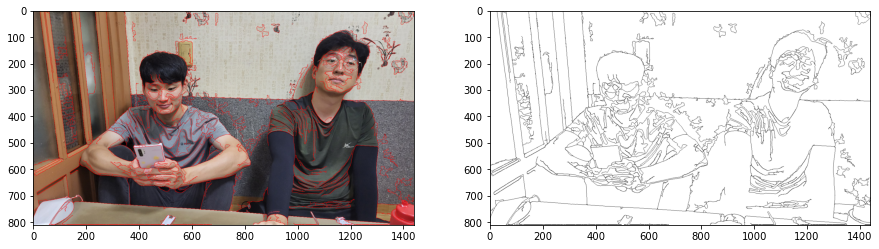

In [210]:





origin = origin_minho_jisu.copy()





origin_HE = hsv_equalizeHist(origin)
HE_me = cv2.medianBlur(origin_HE,7)
cny, clo = canny_closed(HE_me,th_1=25,th_2=175,kernel_val=5)
contours,hier=  cv2.findContours(clo.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)



# 컨투어 선별
cont_level = cont_hier(hier)[0]
cont_size = cont_SizeFilter(contours,80)





# # 선별 컨투어 교집합
li_ContourImame = []
li_Selection = []

for i in cont_level:
    li_Selection.append([j for j in intersection(i,cont_size)])
    
    
temp = li_Selection[0].copy()
temp.extend(li_Selection[1])


    
li_ContourImame = drawContourList(origin,temp,contours) 


    
# # li_ContourImame  에 저장된 이미지 보여주기 (모든 래밸)
f,ax = plt.subplots(1,2)
f.set_size_inches(15,8)

ax[0].imshow(li_ContourImame[0])

ax[1].imshow(li_ContourImame[1])

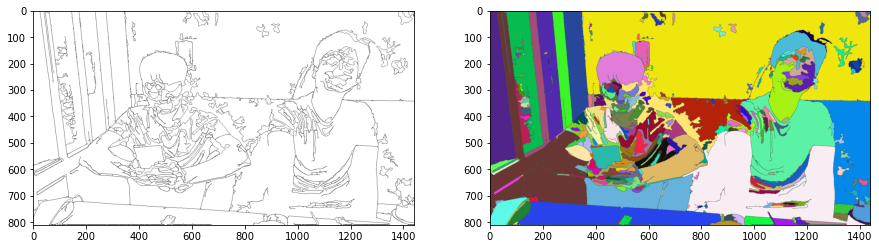

In [206]:


# 이미지 읽기
img = li_ContourImame[1].copy()

# 결과 이미지 생성
img2 = np.zeros_like(img)
# 그레이 스케일과 바이너리 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용 ---①
cnt, labels = cv2.connectedComponents(th,connectivity=4)
#retval, labels, stats, cent = cv2.connectedComponentsWithStats(th)

# 레이블 갯수 만큼 순회
for i in range(cnt):
    # 레이블이 같은 영역에 랜덤한 색상 적용 ---②
    img2[labels==i] =  [int(j) for j in np.random.randint(0,255, 3)]


    
    
f,ax = plt.subplots(1,2)
f.set_size_inches(15,8)

ax[0].imshow(img)
ax[1].imshow(img2)


In [192]:
cv2.imwrite(TestImage_Path+'minho_pop.jpg',img2)

True

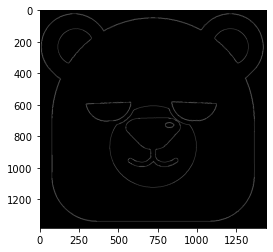

In [98]:
# 모든 컨투어 보여주기

origin = origin_Character_1.copy()

origin_HE = hsv_equalizeHist(origin)
HE_me = cv2.medianBlur(origin_HE,7)
cny, clo = canny_closed(HE_me,th_1=25,th_2=250,kernel_val=5)
contours,hier=   cv2.findContours(clo.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

canvas = origin.copy()
canvas[:,:,:] = 0

x = cv2.drawContours(canvas, contours,-1,(255,255,255))
plt.imshow(x)

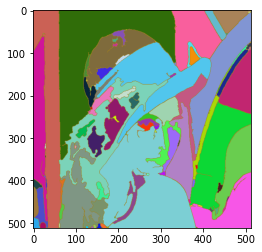

In [69]:
cv2.